In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DataAnalysis= pd.read_csv('yelp_dataset.csv')
DataAnalysis.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours,category,labels
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",NaN,Excellent
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015.0,36.269593,-87.058943,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",NaN,Ok
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123.0,38.565165,-90.321087,3.0,19,"Pubs, Restaurants, Italian, Bars, American (Tr...",NaN,Greek,Great
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207.0,36.208102,-86.768170,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",NaN,Ok
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602.0,27.955269,-82.456320,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",Vietnamese,Excellent


# Restaurants Distribution

Distribution of restaurants in each category

In [3]:
plt.style.use('ggplot')

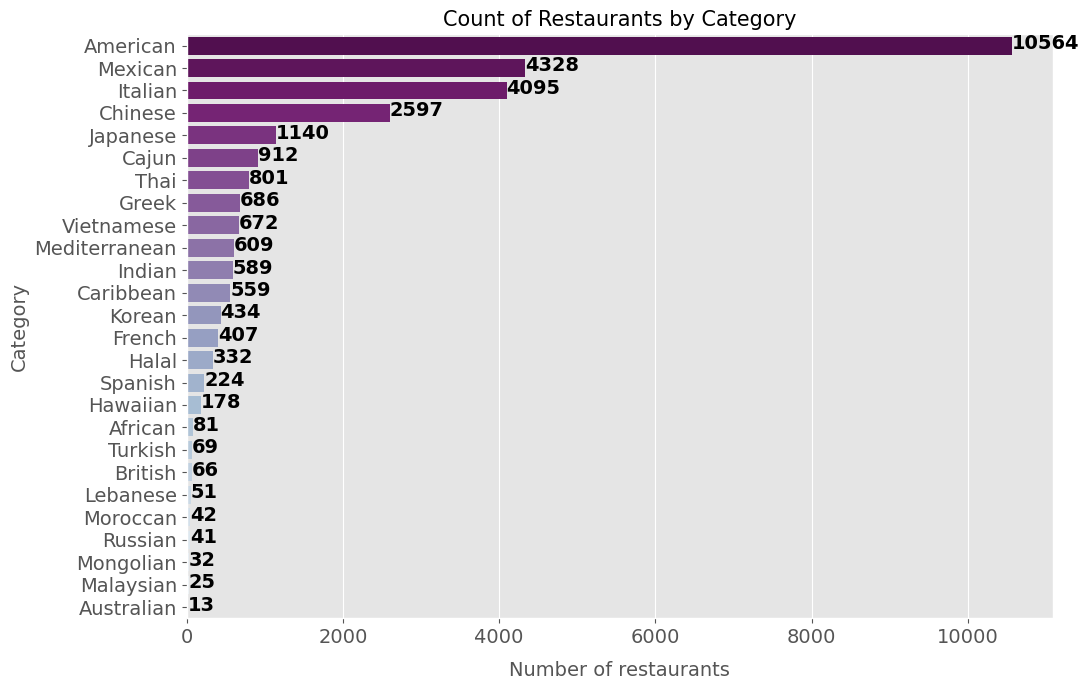

In [4]:

plt.figure(figsize=(11, 7))

# Count the number of restaurants in each category
grouped = DataAnalysis['category'].value_counts()

# Create a count plot using Seaborn
sns.countplot(y='category', data=DataAnalysis, 
              order=grouped.index, palette=sns.color_palette("BuPu_r", len(grouped)))

plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)

# Add annotations to show the count values on the plot
for i, v in enumerate(DataAnalysis['category'].value_counts()):
    plt.text(v, i + 0.15, str(v), fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()



Top 10 restruants in each state 

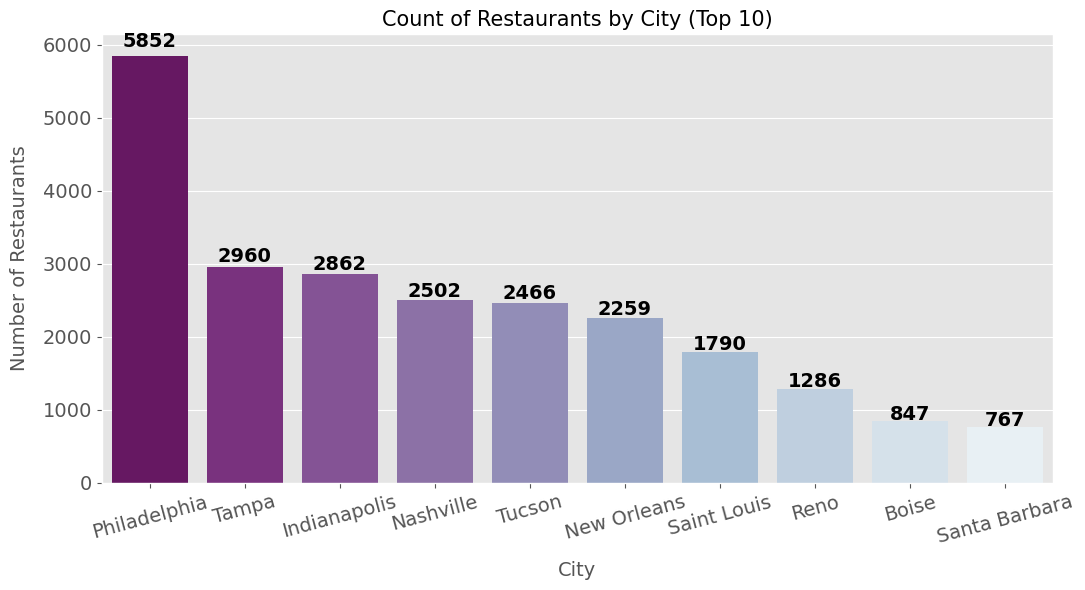

In [5]:
# Set the figure size for the plot
plt.figure(figsize=(11, 6))

# Count the number of restaurants in each city and select the top 10 cities
grouped = DataAnalysis['city'].value_counts()[:10]

# Create the bar plot using Seaborn
sns.barplot(x=grouped.index, y=grouped.values, palette=sns.color_palette("BuPu_r", len(grouped)))

# Customize the plot with labels, title, and ticks
plt.ylabel('Number of Restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

# Annotate each bar with its count value
for i, v in enumerate(grouped):
    plt.text(i, v * 1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Distribution of restaurants in each state

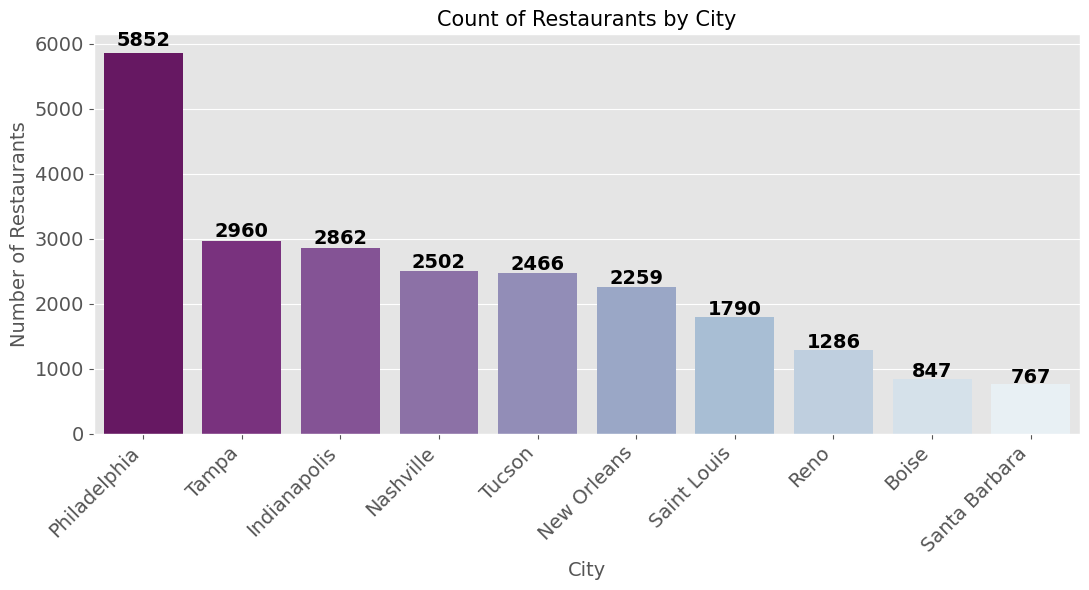

In [6]:
# Set the figure size for the plot
plt.figure(figsize=(11, 6))

# Count the number of restaurants in each city and select the top 10 cities
grouped = DataAnalysis['city'].value_counts()[:10]

# Create the bar plot using Seaborn
sns.barplot(x=grouped.index, y=grouped.values, palette=sns.color_palette("BuPu_r", len(grouped)))

# Customize the plot with labels, title, and ticks
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.title('Count of Restaurants by City', fontsize=15)
plt.tick_params(labelsize=14)

# Rotate x-axis labels at a 45-degree angle for better readability
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its count value
for i, v in enumerate(grouped):
    plt.text(i, v * 1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Reviews Distribution

Distribution of reviews by cuisine type

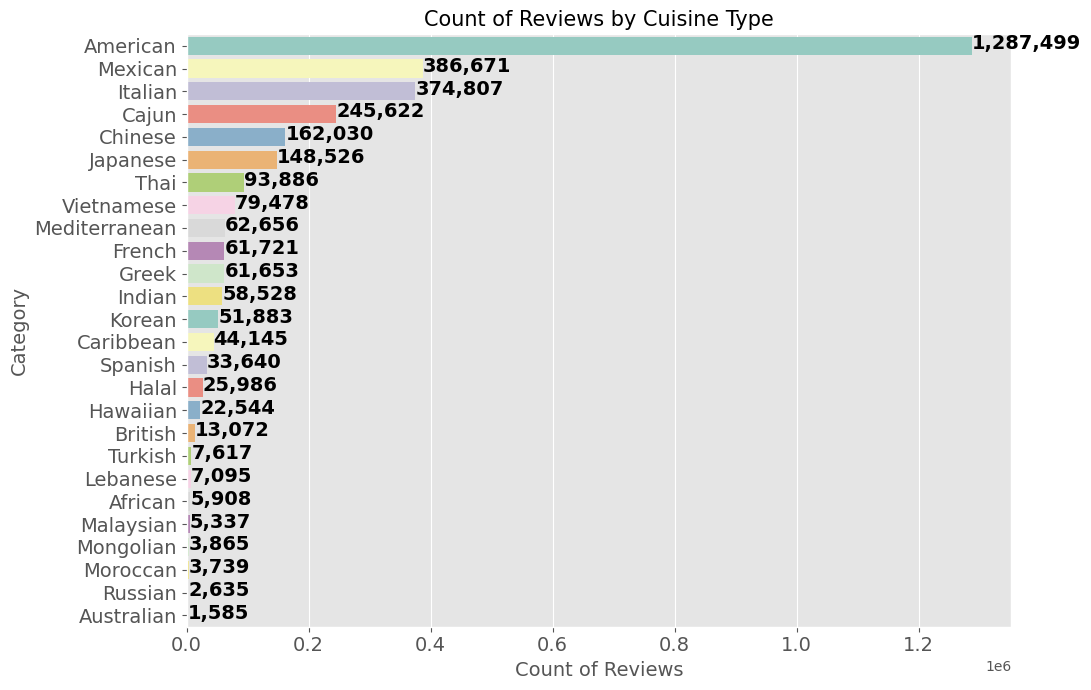

In [7]:
# Set the figure size for the plot
plt.figure(figsize=(11, 7))

# Group the data by category and calculate the sum of review counts for each category, sorted in descending order
grouped = DataAnalysis.groupby('category')['review_count'].sum().sort_values(ascending=False)

# Create the horizontal bar plot using Seaborn
sns.barplot(y=grouped.index, x=grouped.values, palette=sns.color_palette("Set3", len(grouped)))

# Customize the plot with labels, title, and ticks
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of Reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
plt.tick_params(labelsize=14)

# Annotate each bar with its count value (with comma as a thousand separator)
for i, v in enumerate(grouped):
    plt.text(v, i + 0.15, '{:,}'.format(v), fontweight='bold', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Top 10 cities with most reviews

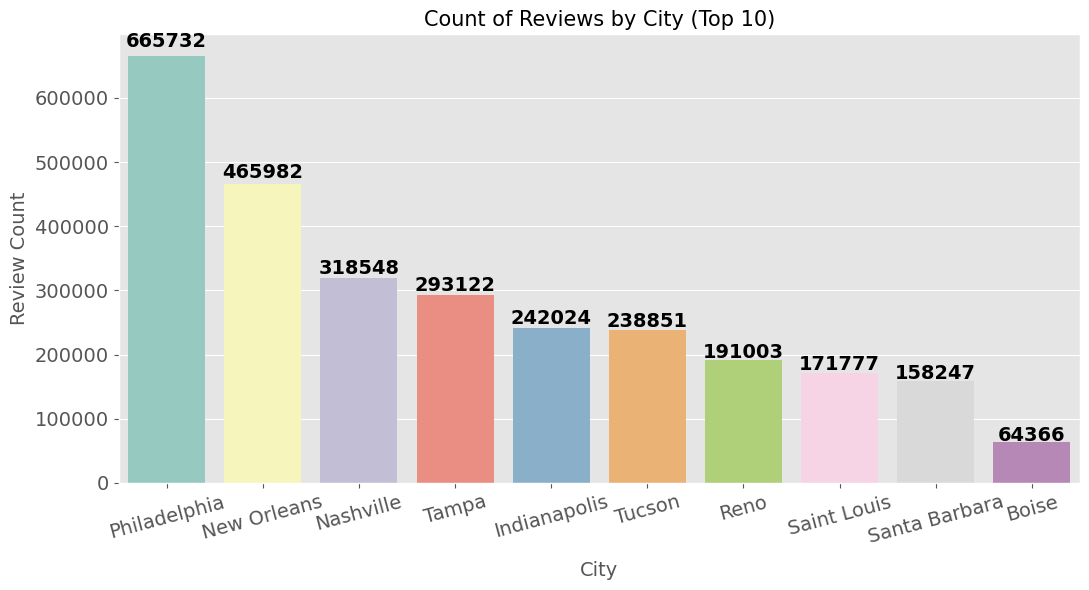

In [8]:
# Set the figure size for the plot
plt.figure(figsize=(11, 6))

# Group the data by city and calculate the sum of review counts for each city, selecting the top 10 cities
grouped = DataAnalysis.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]

# Create the bar plot using Seaborn with 'Set3' color palette
sns.barplot(x=grouped.index, y=grouped.values, palette='Set3')

# Customize the plot with labels, title, and ticks
plt.xlabel('City', labelpad=10, fontsize=14)
plt.ylabel('Review Count', fontsize=14)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

# Annotate each bar with its count value
for i, v in enumerate(grouped):
    plt.text(i, v * 1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

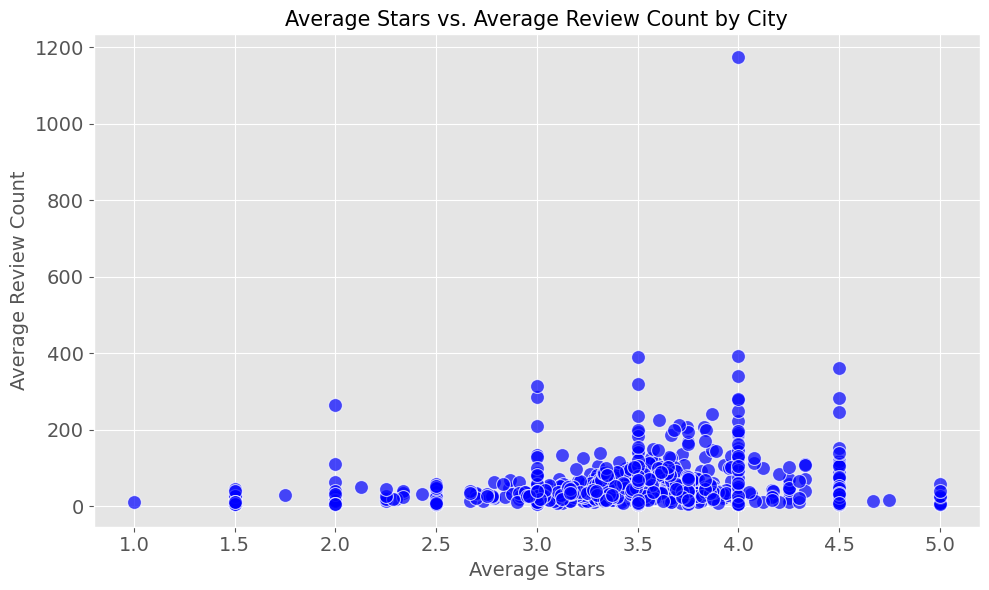

In [10]:
# Group the data by city and calculate the average stars and average review count for each city
grouped = DataAnalysis.groupby('city').agg({'stars': 'mean', 'review_count': 'mean'}).reset_index()

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create the scatter plot using Seaborn
sns.scatterplot(x='stars', y='review_count', data=grouped, color='b', s=100, alpha=0.7)

# Customize the plot with labels and title
plt.xlabel('Average Stars', fontsize=14)
plt.ylabel('Average Review Count', fontsize=14)
plt.title('Average Stars vs. Average Review Count by City', fontsize=15)
plt.tick_params(labelsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Top 10 catergories with most reviews

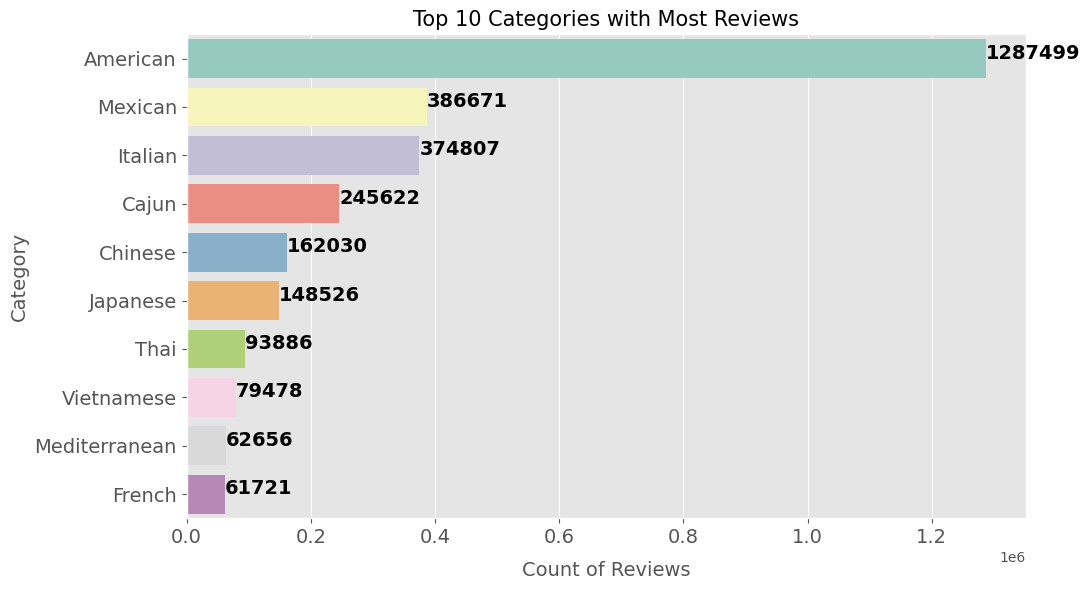

In [11]:
# Set the figure size for the plot
plt.figure(figsize=(11, 6))

# Group the data by category and calculate the sum of review counts for each category, selecting the top 10 categories
grouped = DataAnalysis.groupby('category')['review_count'].sum().sort_values(ascending=False)[:10]

# Create the bar plot using Seaborn with 'Set3' color palette
sns.barplot(x=grouped.values, y=grouped.index, palette='Set3')

# Customize the plot with labels, title, and ticks
plt.xlabel('Count of Reviews', labelpad=10, fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.title('Top 10 Categories with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)

# Annotate each bar with its count value
for i, v in enumerate(grouped.values):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

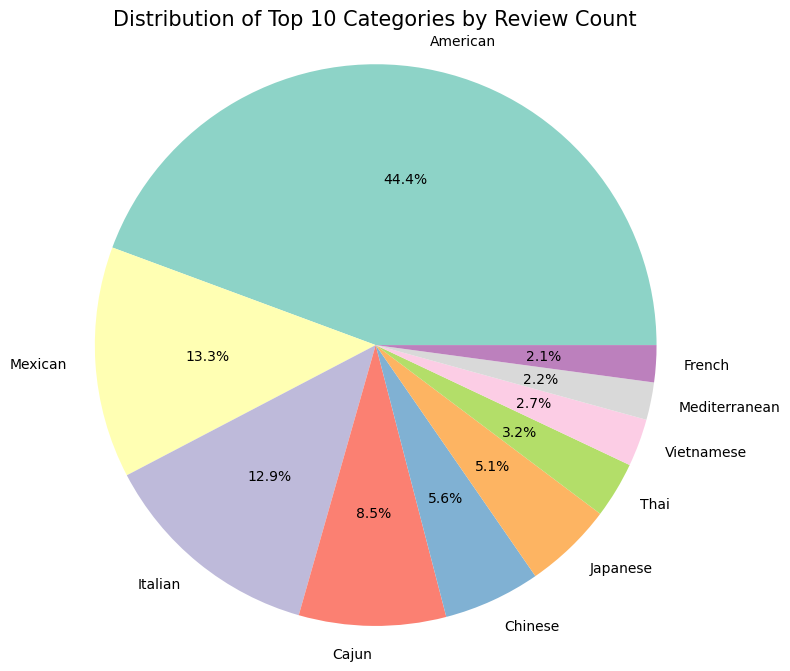

In [12]:
# Group the data by category and calculate the sum of review counts for each category, selecting the top 10 categories
grouped = DataAnalysis.groupby('category')['review_count'].sum().sort_values(ascending=False)[:10]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped.values, labels=grouped.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Top 10 Categories by Review Count', fontsize=15)

# Show the chart
plt.axis('equal')
plt.show()